<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularized Regression
## 1. Training set  / Test set


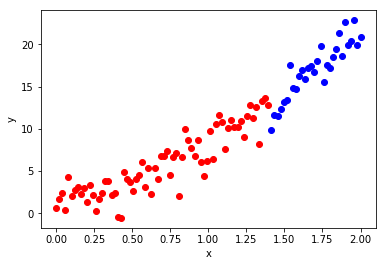

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


name_file = './data_lab2_iis.txt'

columns = ['x', 'y']
data_in = pd.read_csv(name_file, names=columns, sep=' ')


data_size = len(data_in)

train_size = int(data_size * 0.7)
test_size = int(data_size * 0.3)

x = np.asarray(data_in['x'][:train_size])
y = np.asarray(data_in['y'][:train_size])

x_test = np.asarray(data_in['x'][-test_size:])
y_test = np.asarray(data_in['y'][-test_size:])


plt.plot(x, y, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## 2. Finding optimal parameters by closed-form solution

In [21]:
# define x(i)

I = train_size

x1 = np.concatenate((np.ones(I).reshape(-1, 1), x.reshape(-1, 1)), axis=1)

x2 = np.concatenate((np.ones(I).reshape(-1, 1), x.reshape(-1, 1), 
                     (x**2).reshape(-1, 1)), axis=1)

x3 = np.concatenate((np.ones(I).reshape(-1, 1), x.reshape(-1, 1), 
                     (x**2).reshape(-1, 1), (x**3).reshape(-1, 1), 
                     (x**4).reshape(-1, 1), (x**5).reshape(-1, 1)), axis=1)

x4 = np.concatenate((np.ones(I).reshape(-1, 1), x.reshape(-1, 1), 
                     (x**2).reshape(-1, 1), (x**3).reshape(-1, 1),
                     (x**4).reshape(-1, 1), (x**5).reshape(-1, 1)), axis=1)



# finding thetas

# a) unregularized linear

x1_tp = np.transpose(x1)

theta1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x1_tp, x1)), x1_tp), y)


# b) unregularized parabolic

x2_tp = np.transpose(x2)

theta2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x2_tp, x2)), x2_tp), y)


# c) unregularized 5th-order polynomial

x3_tp = np.transpose(x3)

theta3 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x3_tp, x3)), x3_tp), y)


# d) regularized 5th-order polynomial (RIDGE)

x4_tp = np.transpose(x4)

Lambda = 0.1

mat = np.identity(x4.shape[1])
mat[0, 0] = 0

theta4 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x4_tp, x4) + Lambda * mat), x4_tp), y)


# print theta values
print(theta1)
print(theta2)
print(theta3)
print(theta4)

[0.18763866 8.26760735]
[1.5774796  2.19727265 4.35480533]
[  1.64250254   8.42867414 -44.08589458 107.37525222 -91.43111654
  26.56182717]
[ 1.72291769  1.61121991  3.36746005  2.2900274   0.33199659 -1.02156364]


## 3. Plot traing data as well as fitted curve

In [0]:
def f(theta, x):
    result = 0.
    for i in range(theta.size):
        result += float(theta[i]) * (x**i)
    return result

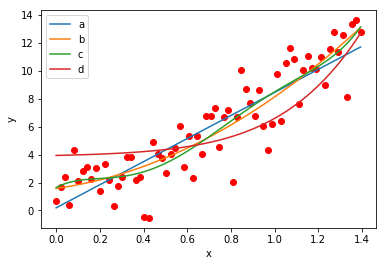

In [17]:
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, f(theta1, x), label = "a")
plt.plot(x, f(theta2, x), label = "b")
plt.plot(x, f(theta3, x), label = "c")
plt.plot(x, f(theta4, x), label = "d")

plt.legend()

plt.show()

## 4. Compute traing errors

In [0]:
def SSE(y_hat, y):
    if y_hat.size != y.size:
        print("Invalid arguments for SSE function")
        exit()

    result = 0.
    for i in range(1, y.size):
        result += float(y_hat[i] - y[i]) ** 2
    return result / 2

In [19]:
y1_hat = np.empty((y.size, 1))
y2_hat = np.empty((y.size, 1))
y3_hat = np.empty((y.size, 1))
y4_hat = np.empty((y.size, 1))

theta1_tp = np.transpose(theta1)
theta2_tp = np.transpose(theta2)
theta3_tp = np.transpose(theta3)
theta4_tp = np.transpose(theta4)

for i in range(0, I):
    y1_hat[i] = np.matmul(theta1_tp, x1[i])
    y2_hat[i] = np.matmul(theta2_tp, x2[i])
    y3_hat[i] = np.matmul(theta3_tp, x3[i])
    y4_hat[i] = np.matmul(theta4_tp, x4[i])
    
error1 = SSE(y1_hat, y)
error2 = SSE(y2_hat, y)
error3 = SSE(y3_hat, y)
error4 = SSE(y4_hat, y)

print(error1)
print(error2)
print(error3)
print(error4)

105.07313735593334
90.06767412459644
87.4632870008633
154.6889304531787


## 5. Plot test data

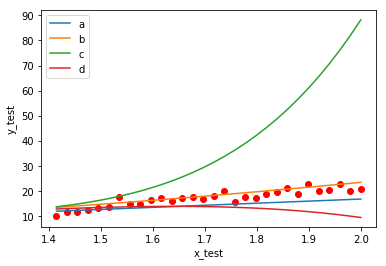

In [22]:
plt.plot(x_test, y_test, 'ro')
plt.xlabel('x_test')
plt.ylabel('y_test')

plt.plot(x_test, f(theta1, x_test), label = "a")
plt.plot(x_test, f(theta2, x_test), label = "b")
plt.plot(x_test, f(theta3, x_test), label = "c")
plt.plot(x_test, f(theta4, x_test), label = "d")

plt.legend()

plt.show()

## 6. Compute test errors

In [8]:
I = test_size

x1_test = np.concatenate((np.ones(I).reshape(-1, 1), x_test.reshape(-1, 1)), axis=1)

x2_test = np.concatenate((np.ones(I).reshape(-1, 1), x_test.reshape(-1, 1), 
                     (x_test**2).reshape(-1, 1)), axis=1)

x3_test = np.concatenate((np.ones(I).reshape(-1, 1), x_test.reshape(-1, 1), 
                     (x_test**2).reshape(-1, 1), (x_test**3).reshape(-1, 1), 
                     (x_test**4).reshape(-1, 1), (x_test**5).reshape(-1, 1)), axis=1)

x4_test = np.concatenate((np.ones(I).reshape(-1, 1), x_test.reshape(-1, 1), 
                     (x_test**2).reshape(-1, 1), (x_test**3).reshape(-1, 1),
                     (x_test**4).reshape(-1, 1), (x_test**5).reshape(-1, 1)), axis=1)

y1_hat_test = np.empty((y_test.size, 1))
y2_hat_test = np.empty((y_test.size, 1))
y3_hat_test = np.empty((y_test.size, 1))
y4_hat_test = np.empty((y_test.size, 1))

for i in range(0, I):
    y1_hat_test[i] = np.matmul(theta1_tp, x1_test[i])
    y2_hat_test[i] = np.matmul(theta2_tp, x2_test[i])
    y3_hat_test[i] = np.matmul(theta3_tp, x3_test[i])
    y4_hat_test[i] = np.matmul(theta4_tp, x4_test[i])
    
error1_test = SSE(y1_hat_test, y_test)
error2_test = SSE(y2_hat_test, y_test)
error3_test = SSE(y3_hat_test, y_test)
error4_test = SSE(y4_hat_test, y_test)

print(error1_test)
print(error2_test)
print(error3_test)
print(error4_test)


176.72291475280844
41.1523531137311
11849.173052928854
525.3222253070908
